In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller


In [2]:
# Load the dataset
file_path = 'WHO-COVID-19-global-data.csv'  # Replace with the actual path to your file
df_data = pd.read_csv(file_path)

In [3]:
#  Drop the 'Country_code' and 'WHO_region' columns
df_cleaned = df_data.drop(columns=['Country_code', 'WHO_region'])

#Fill missing values in 'New_cases' and 'New_deaths' with 0
df_cleaned['New_cases'].fillna(0, inplace=True)
df_cleaned['New_deaths'].fillna(0, inplace=True)

# Convert 'Date_reported' to datetime format
df_cleaned['Date_reported'] = pd.to_datetime(df_cleaned['Date_reported'])


In [5]:
# Apply One-Hot Encoding to the 'Country' column
df_encoded = pd.get_dummies(df_cleaned, columns=['Country'], drop_first=True)

In [6]:
# Creating lag features for 'New_cases' to predict 'New_deaths'
# Lag of 1, 2, and 3 days.
df_encoded['New_cases_lag1'] = df_encoded['New_cases'].shift(1)
df_encoded['New_cases_lag2'] = df_encoded['New_cases'].shift(2)
df_encoded['New_cases_lag3'] = df_encoded['New_cases'].shift(3)

# Dropping any rows with NaN values that resulted from the lagging process
df_encoded.dropna(inplace=True)

In [7]:
# Define the target variable (New_deaths) and features
X = df_encoded.drop(columns=['Date_reported', 'New_deaths'])  # Exclude target and date columns
y = df_encoded['New_deaths']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)


New Deaths And Prediction For Guinea "my country of origin"

In [9]:
# Filter the dataset for Guinea
df_Guinea = df_encoded[df_encoded['Country_Guinea'] == 1]

# Define the target variable (New_deaths) and features for the Guinea
X_Guinea = df_Guinea.drop(columns=['Date_reported', 'New_deaths'])  # Exclude target and date columns
y_Guinea = df_Guinea['New_deaths']

# Split the USA data into training and testing sets (e.g., 80% train, 20% test)
X_train_guinea, X_test_Guinea, y_train_Guinea, y_test_Guinea = train_test_split(X_Guinea, y_Guinea, test_size=0.2, random_state=42)

# Train the model using the USA training data
model_Guinea = LinearRegression()
model_Guinea.fit(X_train_guinea, y_train_Guinea)

# Predict the target variable on the USA testing set
y_pred_Guinea = model_Guinea.predict(X_test_Guinea)

# Evaluate the model's performance for Guinea data
mse_Guinea = mean_squared_error(y_test_Guinea, y_pred_Guinea)
r2_Guinea = r2_score(y_test_Guinea, y_pred_Guinea)

mse_Guinea, r2_Guinea


(16.760570415129333, -0.11353713303318957)

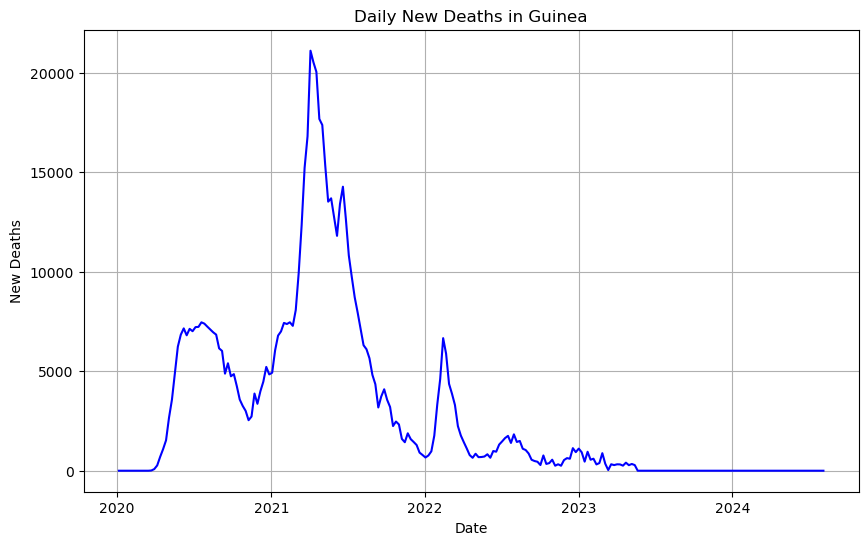

In [19]:
# Prepare the time series data for 'New_deaths' in Guinea
Guinea_deaths_ts = df_Guinea.set_index('Date_reported')['New_deaths']

# Plot the time series to visualize it
plt.figure(figsize=(10, 6))
plt.plot(Guinea_deaths_ts, color='blue')
plt.title('Daily New Deaths in Guinea')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.grid(True)
plt.show()

# Perform the Augmented Dickey-Fuller test to check for stationarity
adf_test = adfuller(Guinea_deaths_ts.dropna(), autolag='AIC')

# Extract and print the results
adf_stat = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


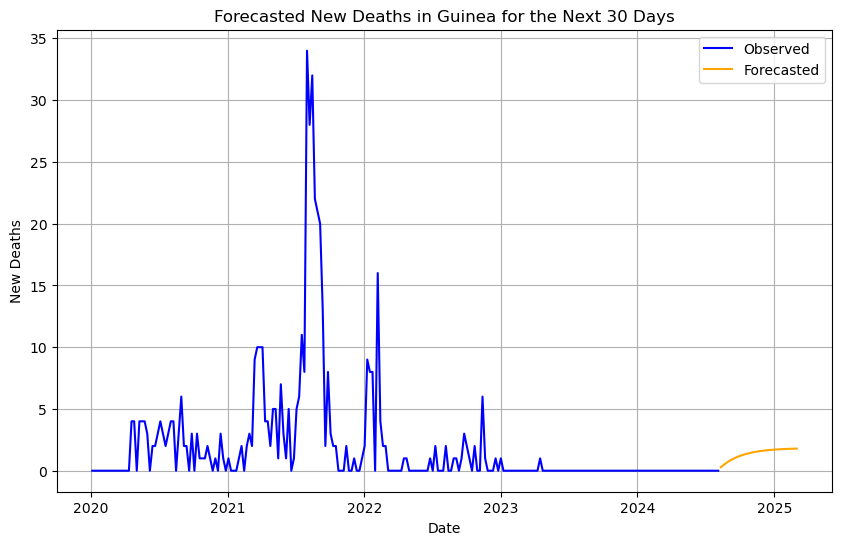

In [11]:
# Fit the ARIMA model
arima_model = ARIMA(Guinea_deaths_ts, order=(1, 0, 1))
arima_result = arima_model.fit()

# Forecast the next 30 days of new deaths
forecast_steps = 30
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=Guinea_deaths_ts.index[-1], periods=forecast_steps + 1, freq='W-SUN')[1:]

# Get the forecasted values
forecast_mean = forecast.predicted_mean

# Plot the forecasted values along with the actual values without confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(Guinea_deaths_ts, label='Observed', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecasted', color='orange')
plt.title('Forecasted New Deaths in Guinea for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.legend()
plt.grid(True)
plt.show()



New Deaths And Prediction For Brazil

In [24]:
# Filter the dataset for Brazil
df_Brazil = df_encoded[df_encoded['Country_Brazil'] == 1]

# Define the target variable (New_deaths) and features for Brazil
X_Brazil = df_Brazil.drop(columns=['Date_reported', 'New_deaths'])  # Exclude target and date columns
y_Brazil = df_Brazil['New_deaths']

# Split the USA data into training and testing sets (e.g., 80% train, 20% test)
X_train_Brazil, X_test_Brazil, y_train_Brazil, y_test_Brazil = train_test_split(X_Brazil, y_Brazil, test_size=0.2, random_state=42)

# Train the model using Germany training data
model_Brazil = LinearRegression()
model_Brazil.fit(X_train_Brazil, y_train_Brazil)

# Predict the target variable on Brazil testing set
y_pred_Brazil = model_Brazil.predict(X_test_Brazil)

# Evaluate the model's performance for the Brazil data
mse_Brazil = mean_squared_error(y_test_Brazil, y_pred_Brazil)
r2_Brazil = r2_score(y_test_Brazil, y_pred_Brazil)

mse_Brazil, r2_Brazil

(12912795.086714944, 0.2787458810237825)

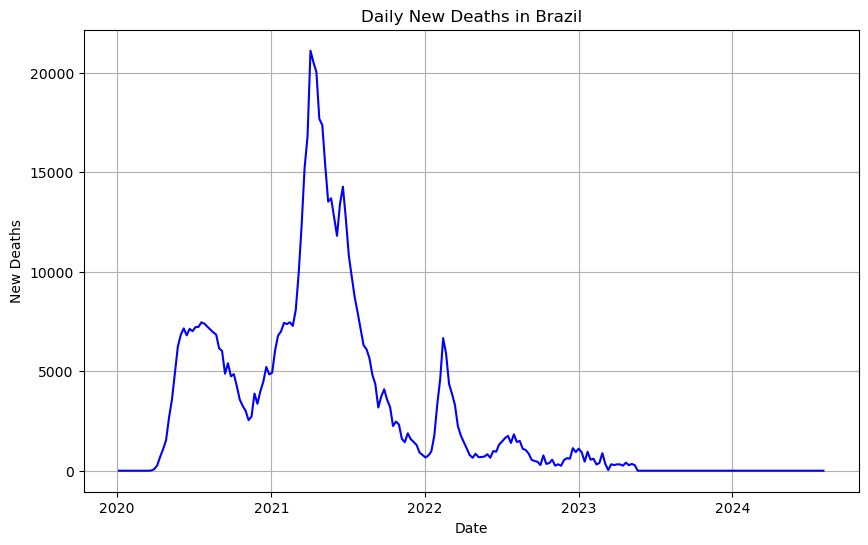

In [25]:
# Prepare the time series data for 'New_deaths' Brazil
Brazil_deaths_ts = df_Brazil.set_index('Date_reported')['New_deaths']

# Plot the time series to visualize it
plt.figure(figsize=(10, 6))
plt.plot(Brazil_deaths_ts, color='blue')
plt.title('Daily New Deaths in Brazil')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.grid(True)
plt.show()

# Perform the Augmented Dickey-Fuller test to check for stationarity
adf_test = adfuller(Brazil_deaths_ts.dropna(), autolag='AIC')

# Extract and print the results
adf_stat = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


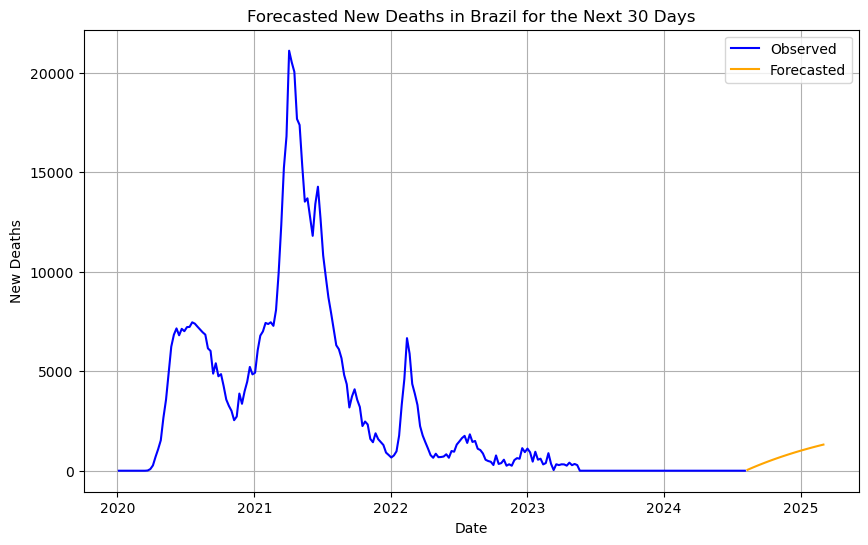

In [26]:
# Fit the ARIMA model
arima_model = ARIMA(Brazil_deaths_ts, order=(1, 0, 1))
arima_result = arima_model.fit()

# Forecast the next 30 days of new deaths
forecast_steps = 30
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=Brazil_deaths_ts.index[-1], periods=forecast_steps + 1, freq='W-SUN')[1:]

# Get the forecasted values
forecast_mean = forecast.predicted_mean

# Plot the forecasted values along with the actual values without confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(Brazil_deaths_ts, label='Observed', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecasted', color='orange')
plt.title('Forecasted New Deaths in Brazil for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.legend()
plt.grid(True)
plt.show()

New Deaths And Prediction For Germany

In [27]:
# Filter the dataset for Brazil
df_Germany = df_encoded[df_encoded['Country_Germany'] == 1]

# Define the target variable (New_deaths) and features for the Germany
X_Germany = df_Germany.drop(columns=['Date_reported', 'New_deaths'])  # Exclude target and date columns
y_Germany = df_Germany['New_deaths']

# Split the USA data into training and testing sets (e.g., 80% train, 20% test)
X_train_Germany, X_test_Germany, y_train_Germany, y_test_Germany = train_test_split(X_Germany, y_Germany, test_size=0.2, random_state=42)

# Train the model using the USA training data
model_Germany = LinearRegression()
model_Germany.fit(X_train_Germany, y_train_Germany)

# Predict the target variable on the USA testing set
y_pred_Germany = model_Germany.predict(X_test_Germany)

# Evaluate the model's performance for the USA data
mse_Germany = mean_squared_error(y_test_Germany, y_pred_Germany)
r2_Germany = r2_score(y_test_Germany, y_pred_Germany)

mse_Germany, r2_Germany

(483808.93014807306, 0.27504471496781036)

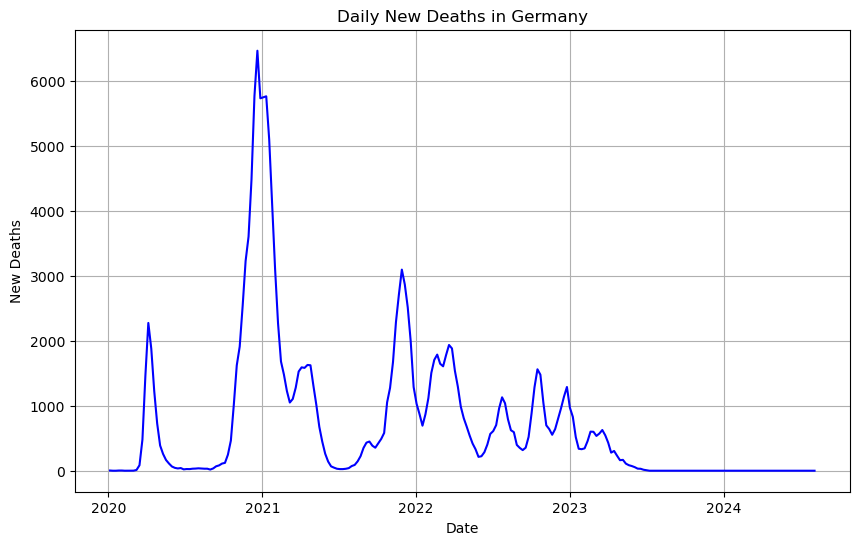

In [29]:
# Prepare the time series data for 'New_deaths' Germany
Germany_deaths_ts = df_Germany.set_index('Date_reported')['New_deaths']

# Plot the time series to visualize it
plt.figure(figsize=(10, 6))
plt.plot(Germany_deaths_ts, color='blue')
plt.title('Daily New Deaths in Germany')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.grid(True)
plt.show()

# Perform the Augmented Dickey-Fuller test to check for stationarity
adf_test = adfuller(Germany_deaths_ts.dropna(), autolag='AIC')

# Extract and print the results
adf_stat = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


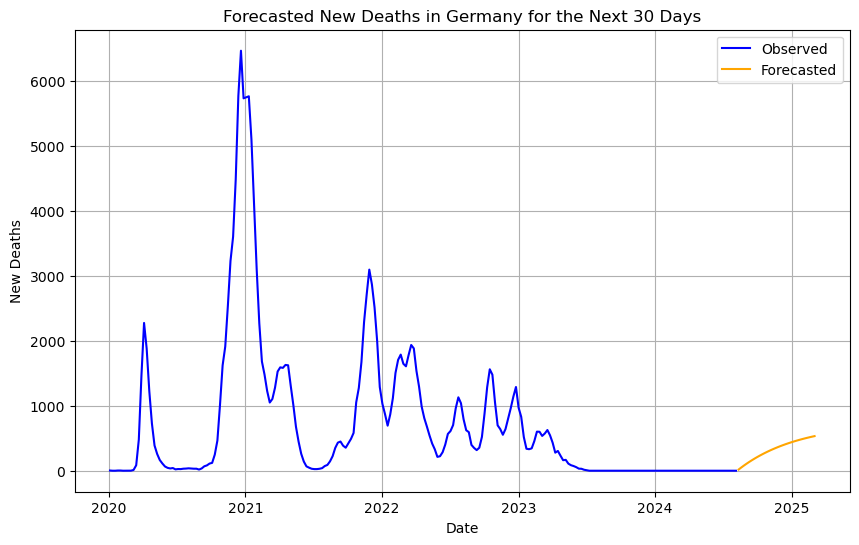

In [30]:
# Fit the ARIMA model
arima_model = ARIMA(Germany_deaths_ts, order=(1, 0, 1))
arima_result = arima_model.fit()

# Forecast the next 30 days of new deaths
forecast_steps = 30
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=Germany_deaths_ts.index[-1], periods=forecast_steps + 1, freq='W-SUN')[1:]

# Get the forecasted values
forecast_mean = forecast.predicted_mean

# Plot the forecasted values along with the actual values without confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(Germany_deaths_ts, label='Observed', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecasted', color='orange')
plt.title('Forecasted New Deaths in Germany for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.legend()
plt.grid(True)
plt.show()